In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

from describe import loadData, trainDataFilePath

data = loadData(trainDataFilePath())
if data is None:
    exit(1)

df = data

In [8]:
df.head()

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


> **Histogram** : Which Hogwarts course has a homogeneous score distribution between all four houses?

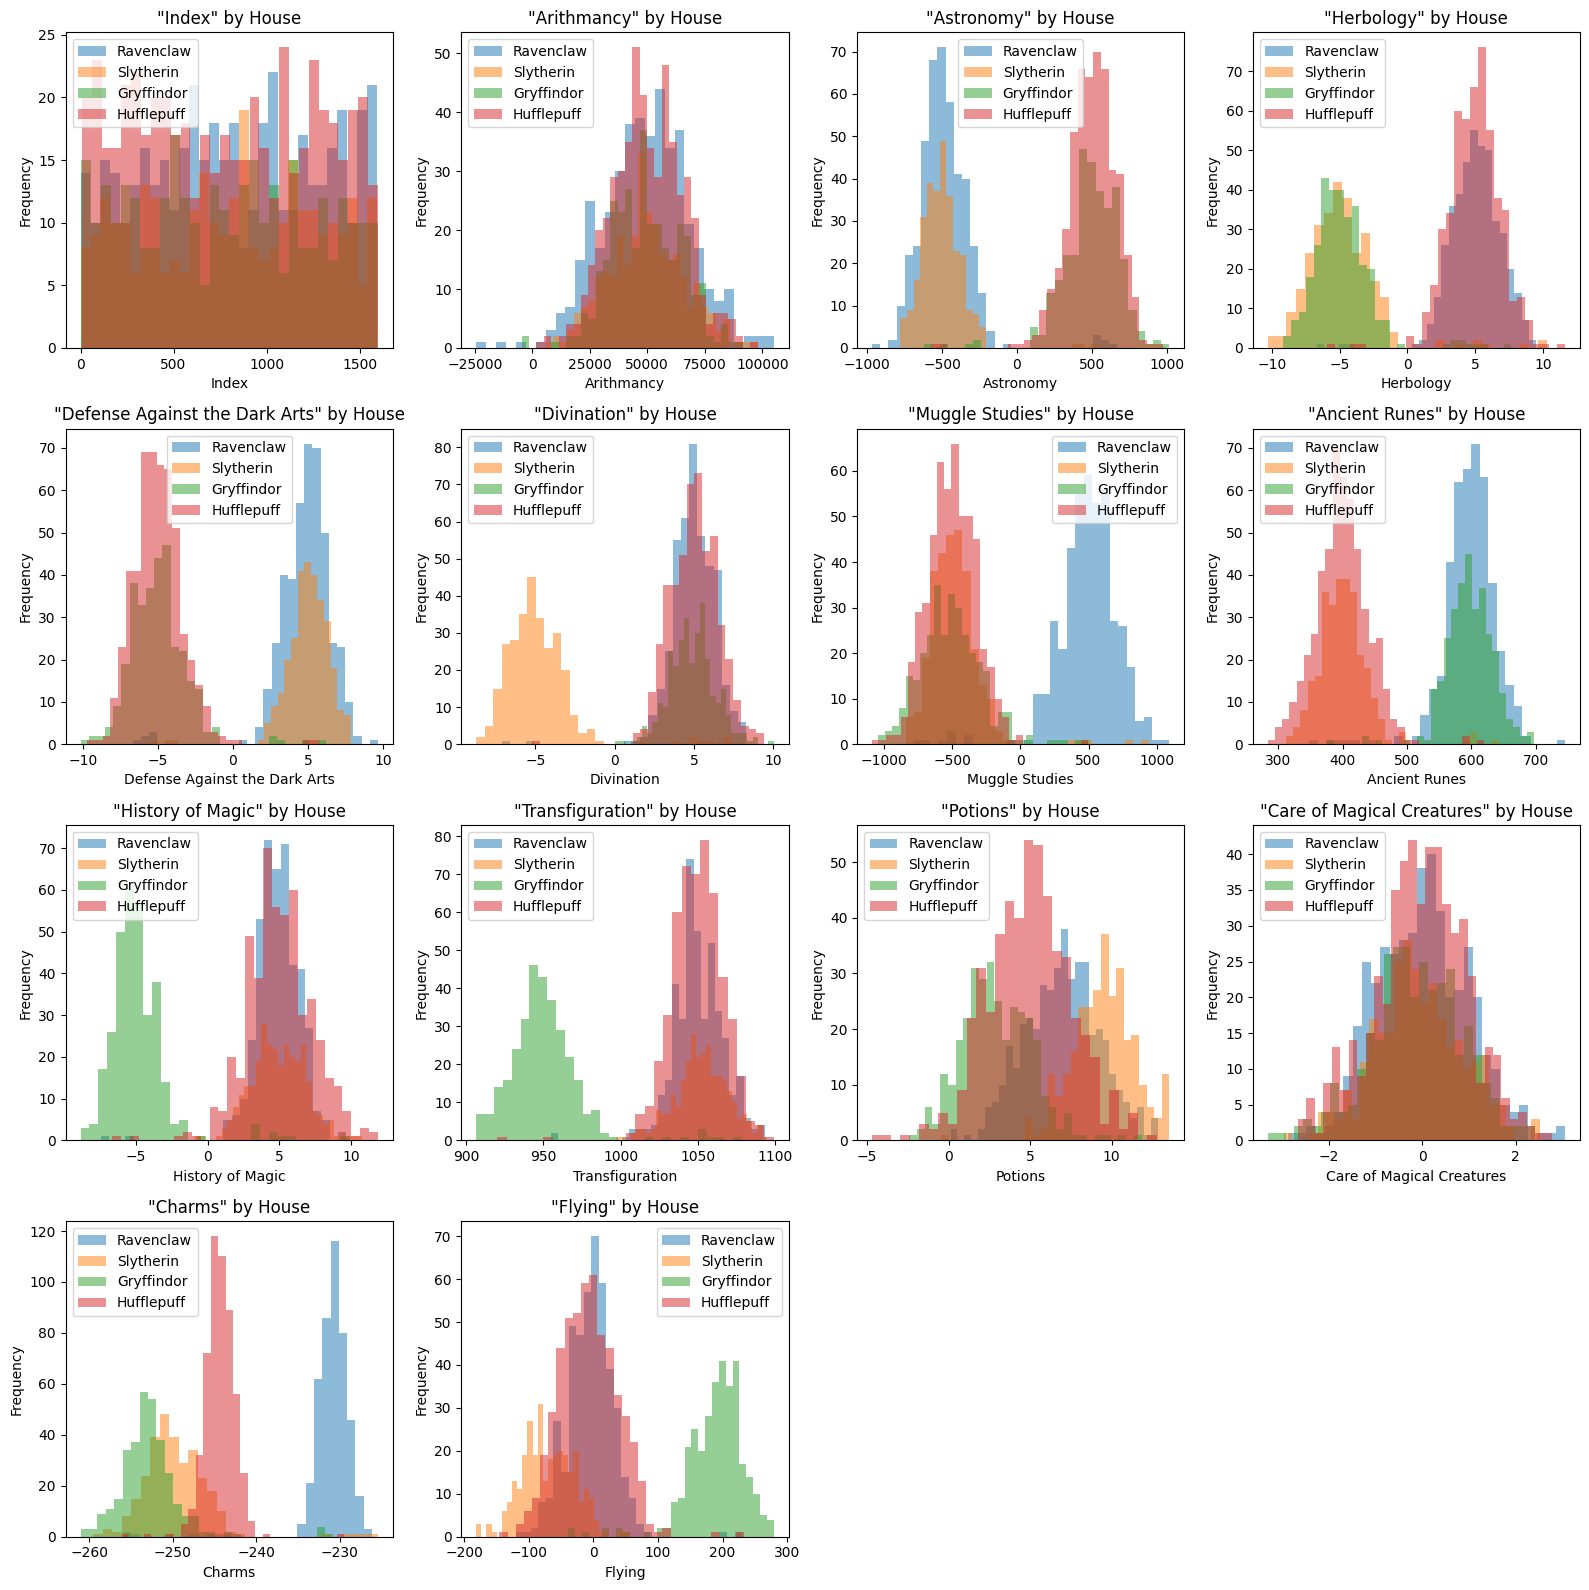

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
num_plots = len(numeric_cols)
all_houses = df["Hogwarts House"].dropna().unique()

cols = math.ceil(math.sqrt(num_plots))
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), squeeze=False)

for i, column in enumerate(numeric_cols):
    ax = axes[i // cols][i % cols]
    for house in all_houses:
        df[df["Hogwarts House"] == house][column].plot(kind='hist', bins=30, alpha=0.5, label=house, ax=ax)

    ax.set_title(f'"{column}" by House')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()